In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [2]:
sms_data = pd.read_csv("data/sms.csv", usecols = [0,1], encoding='latin-1')
sms_data.head()

#make sure to use latin-1 encoding because there may be some different characters in the dataset

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms_data.shape

(5572, 2)

In [4]:
sms_data.isnull().sum() #we have null values

Label      0
Message    0
dtype: int64

In [5]:
sms_data.duplicated().sum()

np.int64(403)

In [6]:
sms_data.drop_duplicates(inplace= True)
sms_data.duplicated().sum()

np.int64(0)

In [7]:
sms_data.shape

(5169, 2)

In [8]:
sms_data.Label.value_counts()
#There is a class imbalance
#Here ham class is more than spam so it creates a bias in the model
#To handle this we will use oversampling/undersampling

Label
ham     4516
spam     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x26dc0d3cb50>,
 [Text(0.5038421675644777, -0.9778256849684042, 'ham'),
  Text(-0.5038424861805011, 0.9778255207957357, 'spam')],
 [Text(0.2748230004897151, -0.5333594645282204, '87.4%'),
  Text(-0.2748231742802733, 0.5333593749794922, '12.6%')])

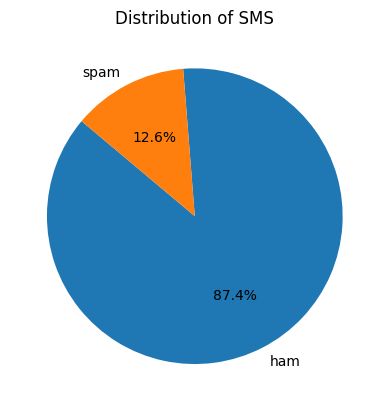

In [9]:
plt.title("Distribution of SMS")
plt.pie(sms_data['Label'].value_counts(), labels = ['ham', 'spam'], autopct = '%1.1f%%', startangle = 140)

In [10]:
email_data = pd.read_csv("data/emails.csv", usecols=[1, 2])
email_data

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [11]:
email_data.shape

(5171, 2)

In [12]:
email_data.isnull().sum()

Label      0
Message    0
dtype: int64

In [13]:
data = pd.concat([email_data, sms_data])
data.head()

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [14]:
data.sample(10)

,Label,Message
3016,ham,"Subject: hpl noms for june 15 , 2000\r\n( see ..."
652,ham,"Wait, do you know if wesleys in town? I bet sh..."
1841,ham,I am in your office na.
4798,ham,Subject: capacity\r\nthese may help w / the st...
973,ham,Subject: pc install p 600\r\ndaren\r\ni ' m wo...
2022,spam,U can WIN ï¿½100 of Music Gift Vouchers every ...
93,spam,Please call our customer service representativ...
4908,ham,"Subject: re : flow volumes at oxy gladewater ,..."
4683,ham,Subject: re : tetco / hpl ( enerfin ) meter # ...
2968,ham,Subject: re : producer connects on the 215 con...


In [15]:
data.shape

(10340, 2)

In [16]:
data.isna().sum()

Label      0
Message    0
dtype: int64

In [17]:
#There are no null values in the dataset

In [18]:
data.duplicated().sum()

np.int64(178)

In [19]:
data[data.duplicated()]

,Label,Message
182,spam,Subject: \r\n
296,spam,Subject: \r\n
363,spam,Subject: \r\n
436,ham,Subject: cornhusker up on 24 th\r\nspoke with ...
624,ham,"Subject: enron / hpl actuals for november 13 ,..."
...,...,...
5061,ham,Subject: tenaska iv\r\nbob :\r\ni understand f...
5064,spam,Subject: \r\nthis week only : f . ree gen . er...
5089,spam,Subject: \r\nthe permanent fix to penis growth...
5155,ham,Subject: cleburne - tenaska iv plant\r\ndaren ...


In [20]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.isna().sum())
print(data.duplicated().sum())

Label      0
Message    0
dtype: int64
0


In [21]:
data.shape

(10162, 2)

In [22]:
data.to_csv("data/spamHam_eda.csv", index=False)

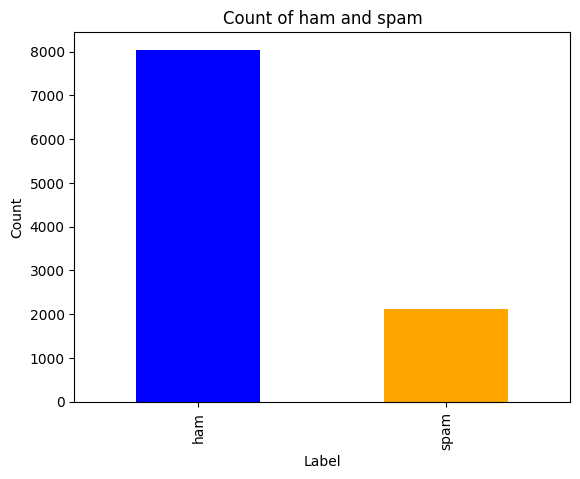

In [23]:
count_Class = pd.value_counts(data.Label, sort = True)
count_Class.plot(kind = 'bar', color=['blue', 'orange'])
plt.title('Count of ham and spam')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [24]:
# The Data is still very imbalanced

In [25]:
eda_data = pd.read_csv("data/spamHam_eda.csv", encoding="latin-1")
eda_data.head()


,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [26]:
eda_data.shape

(10162, 2)

In [27]:
#Text Analytics

In [28]:
from collections import Counter
import nltk

count1 = Counter(" ".join(eda_data[eda_data['Label']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(eda_data[eda_data['Label']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

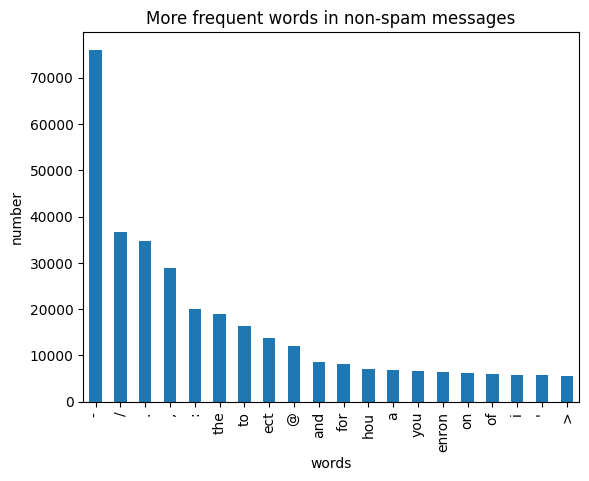

In [29]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

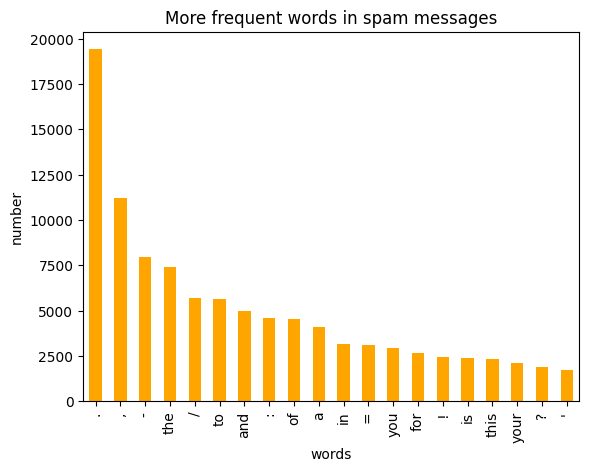

In [30]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [45]:
from nltk import word_tokenize
from nltk.corpus import stopwords


from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

eda_data['Message'] = eda_data['Message'].str.lower()
eda_data['Message'] = eda_data['Message'].str.lower()
eda_data['Message'] = eda_data['Message'].str.replace(r'\W+', ' ')
eda_data['Message'] = eda_data['Message'].str.replace(r'\s+', ' ')
eda_data['Message'] = eda_data['Message'].str.strip()
eda_data['Message'] = eda_data['Message'].str.replace(r'\b\w\b', '')    
eda_data['Message'] = eda_data['Message'].str.replace(r'\b\w{1,2}\b', '')
eda_data['Message'] = eda_data['Message'].str.replace(r'\s+', ' ')  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
eda_data.head()

,Label,Message
0,ham,subject: enron methanol ; meter # : 988291\r\n...
1,ham,"subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"subject: photoshop , windows , office . cheap ..."
4,ham,subject: re : indian springs\r\nthis deal is t...


In [ ]:


stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

# stemming chops words down to their root form whether the root word makes sense or not
def stemming(message):
    message = message.split()
    message = [ps.stem(word) for word in message if word not in stopwords]
    return ' '.join(message)

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()  

# lemmatizing converts the words to their base form in such a way that it the root words make sense
def lemmatizing(message):
    message = message.split()
    message = [lemmatizer.lemmatize(word) for word in message if word not in stopwords]
    return ' '.join(message)

In [51]:
s = stemming("This is test message")
l = lemmatizing("This is test message")
print(s)
print(l)

thi test messag
This test message


In [52]:
eda_data.Message = eda_data.Message.apply(lemmatizing)
eda_data.head()

,Label,Message
0,ham,subject: enron methanol ; meter # : 988291 fol...
1,ham,"subject: hpl nom january 9 , 2001 ( see attach..."
2,ham,"subject: neon retreat ho ho ho , ' around wond..."
3,spam,"subject: photoshop , window , office . cheap ...."
4,ham,subject: : indian spring deal book teco pvr re...


In [56]:
from sklearn import feature_extraction
X = feature_extraction.text.CountVectorizer(lowercase=True)
X = X.fit_transform(eda_data['Message']).toarray()
y = eda_data['Label'].values

In [57]:
print(X)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)  # LabelEncoder is used to convert the labels into numbers, 0 for ham and 1 for spam
y

array([0, 0, 0, ..., 0, 0, 0], shape=(10162,))

In [61]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7113, 52021), (3049, 52021), (7113,), (3049,))

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB(alpha=3)  # using Naive Bayes algorithm for classification
model.fit(X_train, y_train)  # fitting the model on training data
y_pred = model.predict(X_test)  # predicting the labels on testing data

print("Accuracy: ", accuracy_score(y_test, y_pred))  # checking the accuracy of the model
print("Classification Report: \n", classification_report(y_test, y_pred))  # checking the classification report of the model

Accuracy:  0.9563791407018695
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2404
           1       0.90      0.89      0.90       645

    accuracy                           0.96      3049
   macro avg       0.94      0.93      0.93      3049
weighted avg       0.96      0.96      0.96      3049

